# Data Cleaning with Pandas

In [47]:
import numpy as np
import pandas as pd
%matplotlib inline

Sebelum kita masuk ke dalam coding, penting untuk memahami sumber dari data yang hilang. Berikut beberapa alasan umum mengapa data bisa hilang:

- Pengguna lupa mengisi sebuah kolom.
- Data hilang saat ditransfer secara manual dari database lama.
- Terjadi kesalahan pemrograman.
- Pengguna memilih untuk tidak mengisi kolom yang terkait dengan keyakinan mereka tentang bagaimana hasilnya akan digunakan atau ditafsirkan.

Mulailah dengan menanyakan pertanyaan-pertanyaan berikut:

- Apa saja fitur-fiturnya? (kolom)
- Apa saja tipe yang diharapkan (int, float, string, boolean)?
- Apakah ada data yang hilang yang jelas (nilai yang dapat dideteksi oleh Pandas)?
- Apakah ada tipe data hilang lainnya yang tidak begitu jelas (tidak dapat dengan mudah dideteksi oleh Pandas)?

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [49]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


- ST_NUM: Street number
- ST_NAME: Street name
- OWN_OCCUPIED: Is the residence owner occupied
- NUM_BEDROOMS: Number of bedrooms

## Standard Missing Values

Jadi apa yang dimaksud dengan "standard missing values"? Standard missing values adalah missing values yang dapat dideteksi Pandas.

In [50]:
df["ST_NUM"]

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [51]:
df["ST_NUM"].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

## Non-Standard Missing Values
Terkadang mungkin kasus di mana ada missing values yang memiliki format berbeda.

In [52]:
df["NUM_BEDROOMS"]

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [53]:
df["NUM_BEDROOMS"].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

Jika ada beberapa users yang memasukkan data secara manual, ini adalah masalah umum. Mungkin beberapa suka menggunakan "n / a" tapi kalian suka menggunakan "na".

Cara mudah untuk mendeteksi berbagai format ini adalah dengan memasukkannya ke dalam list. Kemudian saat kami mengimpor data, Pandas akan langsung mengenalinya. Berikut adalah contoh bagaimana kita melakukannya.

In [54]:
missing_values = ["n/a", "na", "--"]

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values=missing_values)

In [56]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

## Unexpected Missing Values
Sejauh ini kita telah melihat missing values, dan non-standard missing values. Bagaimana jika kita memiliki tipe yang tidak terduga? Misalnya, jika fitur kita diharapkan berupa string, tetapi malah jenisnya numerik, maka secara teknis ini juga merupakan missing value.

In [57]:
df['OWN_OCCUPIED'] # sehatusnya data yang dimaksukkan ada string, tetapi terdapat data numerik

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [58]:
df['OWN_OCCUPIED'].isnull() # seharusnya nomor 3 adalah True

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

Di baris keempat, ada angka 12. Respons untuk Owner Occupied jelas harus berupa string (Y atau N), jadi tipe numerik ini berupa missing value.



In [59]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [60]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [61]:
df.isnull().sum() # untuk mengetahui jumlah missing value di setiap kolom

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

## Replacing

In [62]:
df['ST_NUM'].fillna(125, inplace=True) # missing value pada kolom "ST_NUM" akan digantikan dengan angka 125
# atau
df["ST_NUM"] = df["ST_NUM"].fillna(100)

In [63]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [64]:
# atau dengan cara ini untuk mengganti di baris tertentu saja
df.loc[2,'ST_NUM'] = 125

In [65]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


Cara yang sangat umum untuk mengganti missing values menggunakan median.

In [66]:
df["NUM_BEDROOMS"]

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [67]:

median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [68]:
df["NUM_BEDROOMS"]

0    3.0
1    3.0
2    3.0
3    1.0
4    3.0
5    3.0
6    2.0
7    3.0
8    3.0
Name: NUM_BEDROOMS, dtype: float64

In [69]:
df.isna()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,True,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False


In [70]:
df.isnull()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,True,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False


## Obesity

In [79]:
data = pd.ExcelFile('dataset/obes.xls')

In [80]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [81]:
#data = pd.read_excel('dataset/obes.xls')

In [82]:
data

In [86]:
data_age = data.parse(u"7.2", skiprows=4, skipfooter=14)

In [87]:
data_age.shape

(12, 10)

In [88]:
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [89]:
data_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11 non-null     object 
 1   Total        11 non-null     float64
 2   Under 16     11 non-null     float64
 3   16-24        11 non-null     float64
 4   25-34        11 non-null     float64
 5   35-44        11 non-null     float64
 6   45-54        11 non-null     float64
 7   55-64        11 non-null     float64
 8   65-74        11 non-null     float64
 9   75 and over  11 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1.1+ KB


In [90]:
data_age.isna()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [91]:
data_age.isna().any()

Unnamed: 0     True
Total          True
Under 16       True
16-24          True
25-34          True
35-44          True
45-54          True
55-64          True
65-74          True
75 and over    True
dtype: bool

In [92]:
data_age.isna().sum()

Unnamed: 0     1
Total          1
Under 16       1
16-24          1
25-34          1
35-44          1
45-54          1
55-64          1
65-74          1
75 and over    1
dtype: int64

In [93]:
data_age.describe()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,6299.181818,590.454545,232.000000,788.181818,1723.454545,1740.454545,935.636364,227.727273,59.363636
std,4314.955778,108.405132,133.192342,555.484080,1215.902822,1412.783166,797.295713,185.395302,34.383929
min,1275.000000,400.000000,65.000000,136.000000,289.000000,216.000000,94.000000,36.000000,20.000000
25%,2299.500000,536.000000,101.500000,314.000000,562.000000,459.000000,216.000000,62.000000,28.000000
50%,5018.000000,579.000000,228.000000,564.000000,1469.000000,1198.000000,598.000000,157.000000,53.000000
75%,10764.000000,644.000000,358.500000,1386.500000,2924.000000,3190.500000,1687.500000,417.000000,90.500000
max,11736.000000,775.000000,391.000000,1484.000000,3277.000000,3581.000000,2119.000000,495.000000,115.000000


In [94]:
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [96]:
data_age.rename({"Unnamed: 0": "Year"}, axis=1)

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [101]:
data_age.dropna(how="all", inplace=True)

In [102]:
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


<Axes: >

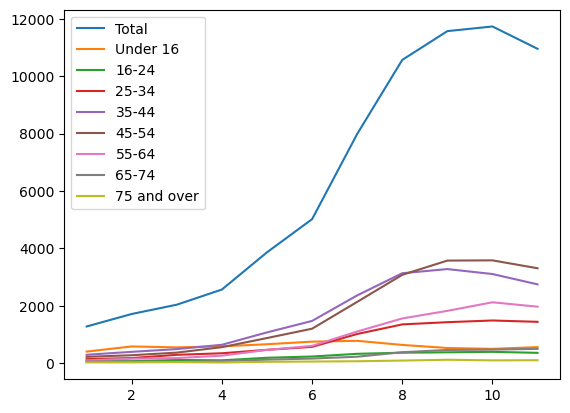

In [103]:
data_age.plot()

In [110]:
data_age.loc[:,"Under 16":"75 and over"].sum(axis=1)

1      1275.0
2      1711.0
3      2034.0
4      2561.0
5      3862.0
6      5014.0
7      7985.0
8     10569.0
9     11566.0
10    11736.0
11    10957.0
dtype: float64

In [111]:
DataAgeMinusTotal = data_age.drop("Total",axis=1)

<Axes: >

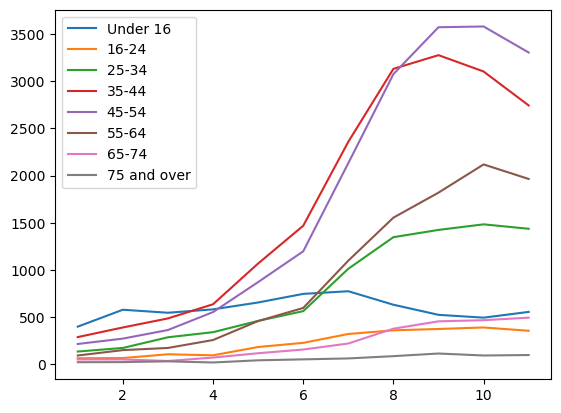

In [112]:
DataAgeMinusTotal.plot()

<Axes: >

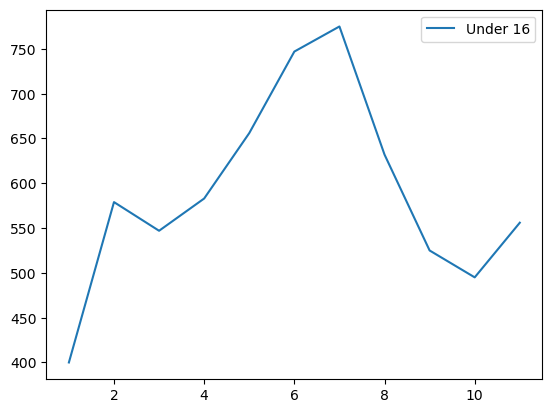

In [114]:
data_age["Under 16"].plot(label="Under 16", legend=True)

<Axes: >

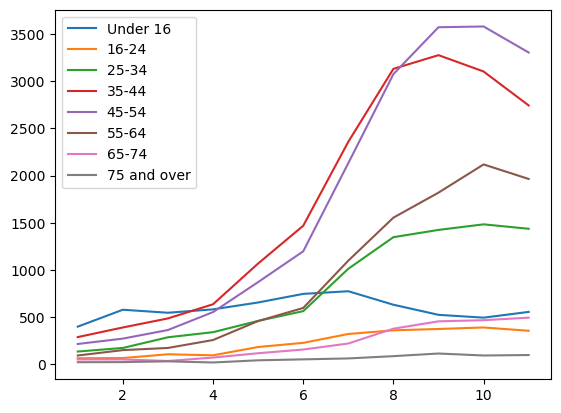

In [118]:
data_age.iloc[:,2:].plot()

In [129]:
# pd.date_range("1/1/2020","11/8/2020") # MM/DD/YYYY
pd.date_range("2020/1/1","2020/1/8") # YYYY/MM/DD

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08'],
              dtype='datetime64[ns]', freq='D')

In [130]:
date_range = pd.date_range("2020/1/1","2020/1/8",freq="H")

In [138]:
datetime = pd.DataFrame(date_range)

In [142]:
datetime.rename(columns={0:"datetime"},inplace=True)

In [145]:
datetime

,datetime
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
164,2020-01-07 20:00:00
165,2020-01-07 21:00:00
166,2020-01-07 22:00:00
167,2020-01-07 23:00:00
